# Loading in the data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_json("Software.json.gz",lines=True)
df2 = df[["overall", "reviewText", "summary"]]
df2.head()

,overall,reviewText,summary
0,4,The materials arrived early and were in excell...,Material Great
1,4,I am really enjoying this book with the worksh...,Health
2,1,"IF YOU ARE TAKING THIS CLASS DON""T WASTE YOUR ...",ARE YOU KIDING ME?
3,3,This book was missing pages!!! Important pages...,missing pages!!
4,5,I have used LearnSmart and can officially say ...,Best study product out there!


In [2]:
##Removing without any text review
df_new = df2[df2['reviewText'].notnull()]
print(len(df2), len(df_new))

459436 459370


# Exploratory Data Analysis

In [3]:
df_new["overall"].value_counts().sort_index()

1    102542
2     31445
3     39394
4     73590
5    212399
Name: overall, dtype: int64

<Axes: >

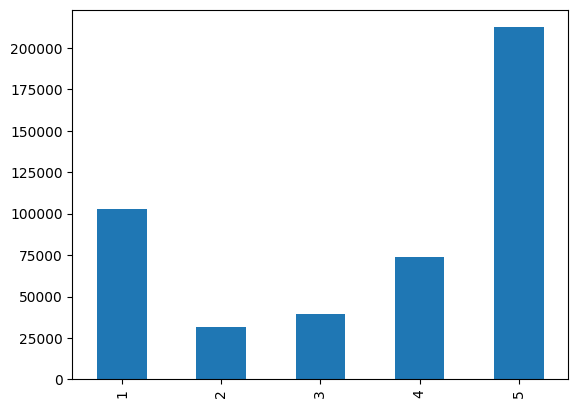

In [4]:
df_new["overall"].value_counts().sort_index().plot(kind='bar')

In [9]:
sentiments = []

for i in df_new["overall"]:
    if i == 1 or i == 2:
        sentiments.append("pegative")
    elif i == 3:
        sentiments.append("neutral")
    else:
        sentiments.append("positive")

df_new["sentiment"] = sentiments

In [6]:
print(len(df_new))
df_new = df_new.loc[df_new["sentiment"] != "neutral"]
print(len(df_new))

459370
419976


Positive    285989
Negative    133987
Name: sentiment, dtype: int64


<Axes: title={'center': 'Class Distribution of Reviews'}, xlabel='Sentiment', ylabel='Count'>

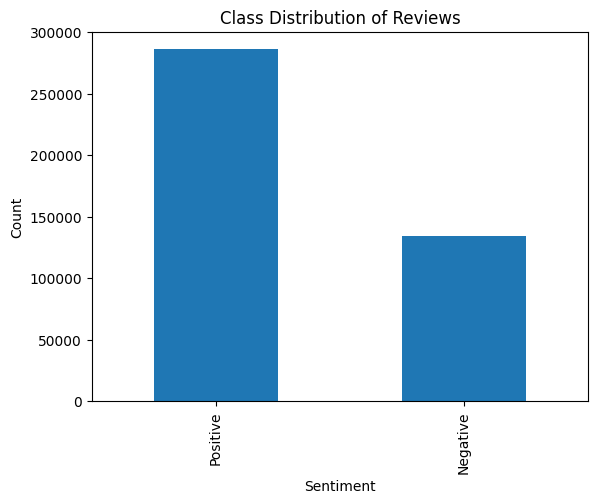

In [10]:
print(df_new["sentiment"].value_counts())
df_new["sentiment"].value_counts().plot(kind='bar', xlabel='Sentiment', ylabel='Count', title='Class Distribution of Reviews')

## Feature Transformation

In [12]:
##Lowercase, stopwords and punctuation
from nltk.corpus import stopwords

df_new['reviewText'] = df_new['reviewText'].str.lower()
stop_words = stopwords.words('english')
df_new['reviewText'] = df_new['reviewText'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
df_new['text'] = df_new['reviewText'].str.replace(r'[^\w\s]+', '')

df_new['text']

C:\Users\marti\AppData\Local\Temp\ipykernel_15064\732557755.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df_new['text'] = df_new['reviewText'].str.replace(r'[^\w\s]+', '')


0         materials arrived early excellent condition ho...
1         really enjoying book worksheets make review go...
2         taking class dont waste money called book 1400...
4         used learnsmart officially say amazing study t...
5         strong backgroung good read quite date takes h...
                                ...                        
459431             instructionsno help unless want pay help
459432                                                 joke
459433    multiple licenses antivirus using 2 years foun...
459434                                           good value
459435                                nice designs easy use
Name: text, Length: 419976, dtype: object

In [13]:
final_df = df_new[['text', 'sentiment']].copy()

In [14]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(final_df['sentiment'])
final_df['sentiment'] = le.transform(final_df['sentiment'])

In [15]:
## 0 being negative, 1 being positive
print(le.classes_)
print(final_df)

['negative' 'positive']
                                                     text  sentiment
0       materials arrived early excellent condition ho...          1
1       really enjoying book worksheets make review go...          1
2       taking class dont waste money called book 1400...          0
4       used learnsmart officially say amazing study t...          1
5       strong backgroung good read quite date takes h...          1
...                                                   ...        ...
459431           instructionsno help unless want pay help          0
459432                                               joke          0
459433  multiple licenses antivirus using 2 years foun...          1
459434                                         good value          1
459435                              nice designs easy use          1

[419976 rows x 2 columns]


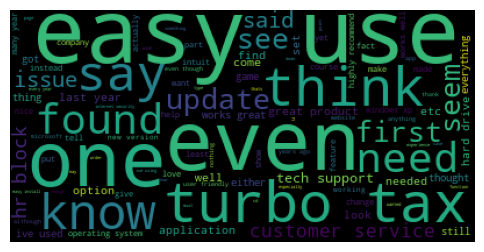

In [147]:
from wordcloud import WordCloud

all_text = " ".join(text for text in final_df['text'])
wordcloud = WordCloud(max_words=100).generate(all_text)

plt.figure(figsize = (6,6))
plt.imshow(wordcloud)

plt.axis("off")
plt.show()

In [16]:
#Tokenizing
from nltk.tokenize import word_tokenize

final_df['tokenized'] = final_df.apply(lambda row: word_tokenize(row['text']), axis=1)

In [17]:
very_final_df = final_df[['tokenized', 'sentiment','text']].copy()

In [18]:
very_final_df

,tokenized,sentiment,text
0,"[materials, arrived, early, excellent, conditi...",1,materials arrived early excellent condition ho...
1,"[really, enjoying, book, worksheets, make, rev...",1,really enjoying book worksheets make review go...
2,"[taking, class, dont, waste, money, called, bo...",0,taking class dont waste money called book 1400...
4,"[used, learnsmart, officially, say, amazing, s...",1,used learnsmart officially say amazing study t...
5,"[strong, backgroung, good, read, quite, date, ...",1,strong backgroung good read quite date takes h...
...,...,...,...
459431,"[instructionsno, help, unless, want, pay, help]",0,instructionsno help unless want pay help
459432,[joke],0,joke
459433,"[multiple, licenses, antivirus, using, 2, year...",1,multiple licenses antivirus using 2 years foun...
459434,"[good, value]",1,good value


In [168]:
very_final_df['tokenized'][0]

['materials',
 'arrived',
 'early',
 'excellent',
 'condition',
 'however',
 'money',
 'spent',
 'really',
 'come',
 'binder',
 'loose',
 'leaf']

In [19]:
very_final_df.to_pickle('final_df.pkl')